<a href="https://www.kaggle.com/code/mahbuburrahman2020/se-europe-data-challenge-data-analysis?scriptVersionId=160180103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/gen_2022_monthly.csv"

In [4]:
df_gen_2022_monthly = pd.read_csv(file_name)
df_gen_2022_monthly

,StartTime,EndTime,PsrType,AreaID,Country,CountryID,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13777505.0
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,12540609.0
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13949928.0
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13169383.0
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13334915.0
...,...,...,...,...,...,...,...
739,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,NaN,UK,1.0,479952.0
740,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,NaN,UK,1.0,27040.0
741,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,NaN,UK,1.0,177457.0
742,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,NaN,UK,1.0,577406.0


In [4]:
file_name = "gen_2022_data_profile.html"

In [5]:
from ydata_profiling import ProfileReport
df_gen_data_profile_path = os.path.join('/kaggle/working/', file_name)
profile = ProfileReport(df_gen_2022_monthly, title="Energy Generation : Year 2022")
profile.to_file(df_gen_data_profile_path)

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df_gen_2022_monthly = df_gen_2022_monthly.dropna()
df_gen_2022_monthly = df_gen_2022_monthly.set_index(pd.Index(np.arange(0, df_gen_2022_monthly.shape[0])))
df_gen_2022_monthly

,StartTime,EndTime,PsrType,AreaID,Country,CountryID,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13777505.0
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,12540609.0
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13949928.0
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13169383.0
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,10Y1001A1001A83F,DE,2.0,13334915.0
...,...,...,...,...,...,...,...
605,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,10Y1001A1001A92E,UK,1.0,481819.0
606,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,10Y1001A1001A92E,UK,1.0,27196.0
607,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,10Y1001A1001A92E,UK,1.0,177543.0
608,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,10Y1001A1001A92E,UK,1.0,578316.0


In [6]:
df_gen_2022_monthly_temp = pd.DataFrame(data=[], columns=["StartTime", "EndTime", "PsrType", "PsrTypeName", "GenType", "AreaID", "Country", "CountryID", "quantity"])
index = 0
while index < df_gen_2022_monthly.shape[0]:
    row = df_gen_2022_monthly.loc[index]
    
    df_gen_2022_monthly_temp.loc[index, "StartTime"] = row["StartTime"]
    df_gen_2022_monthly_temp.loc[index, "EndTime"] = row["EndTime"]
    df_gen_2022_monthly_temp.loc[index, "PsrType"] = row["PsrType"]
    df_gen_2022_monthly_temp.loc[index, "AreaID"] = row["AreaID"]
    df_gen_2022_monthly_temp.loc[index, "Country"] = row["Country"]
    df_gen_2022_monthly_temp.loc[index, "CountryID"] = row["CountryID"]
    df_gen_2022_monthly_temp.loc[index, "quantity"] = row["quantity"]
    
    if row["PsrType"] == "B18" or row["PsrType"] == "B19":
        df_gen_2022_monthly_temp.loc[index, "GenType"] = "Wind"
    elif row["PsrType"] == "B16":
        df_gen_2022_monthly_temp.loc[index, "GenType"] = "Solar"
    elif row["PsrType"] == "B10" or row["PsrType"] == "B11" or row["PsrType"] == "B12":
        df_gen_2022_monthly_temp.loc[index, "GenType"] = "Water"
    elif row["PsrType"] == "B01" or row["PsrType"] == "B09" or row["PsrType"] == "B15":
        df_gen_2022_monthly_temp.loc[index, "GenType"] = "Other"
    
    if row["PsrType"] == "B18":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Wind Offshore"
    elif row["PsrType"] == "B19":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Wind Onshore"
    elif row["PsrType"] == "B16":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Solar"
    elif row["PsrType"] == "B10":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Hydro Pumped Storage"
    elif row["PsrType"] == "B11":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Hydro Run-of-river and poundage"
    elif row["PsrType"] == "B12":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Hydro Water Reservoir"
    elif row["PsrType"] == "B01":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Biomass"
    elif row["PsrType"] == "B09":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Geothermal"
    elif row["PsrType"] == "B15":
        df_gen_2022_monthly_temp.loc[index, "PsrTypeName"] = "Other renewable"
    
    index = index + 1

In [7]:
df_gen_2022_monthly_temp

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,13777505.0
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,12540609.0
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,13949928.0
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,13169383.0
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,13334915.0
...,...,...,...,...,...,...,...,...,...
605,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1.0,481819.0
606,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1.0,27196.0
607,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1.0,177543.0
608,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A92E,UK,1.0,578316.0


In [8]:
df_gen_2022_monthly = df_gen_2022_monthly_temp

In [17]:
df_gen_2022_monthly.to_csv(f"/kaggle/working/gen_2022_monthly_v1.csv", index=False)

In [35]:
df_gen_2022_country_gen_types = df_gen_2022_monthly.groupby(by=["Country", "GenType", "PsrTypeName"])[["quantity"]].sum()
df_gen_2022_country_gen_types

quantity
Country GenType PsrTypeName                                 
DE      Other   Biomass                          157870113.0
                Geothermal                          785268.0
                Other renewable                    4115606.0
        Solar   Solar                            221763900.0
        Water   Hydro Pumped Storage              42411047.0
                Hydro Run-of-river and poundage   45027903.0
                Hydro Water Reservoir              4497667.0
        Wind    Wind Offshore                     98981373.0
                Wind Onshore                     402241380.0
DK      Other   Biomass                            4105891.0
        Solar   Solar                              2110925.0
        Wind    Wind Offshore                      8449686.0
                Wind Onshore                      10521997.0
HU      Other   Biomass                            4456243.0
                Geothermal                            2947.0
                Other renewable                     430235.0
        Solar   Solar                             12322431.0
        Water   Hydro Run-of-river and poundage     318568.0
                Hydro Water Reservoir               299303.0
        Wind    Wind Onshore                       2338736.0
IT      Other   Biomass                            5552330.0
                Geothermal                         5444343.0
        Solar   Solar                             22472314.0
        Water   Hydro Pumped Storage               2919242.0
                Hydro Run-of-river and poundage   23005989.0
                Hydro Water Reservoir              3353870.0
        Wind    Wind Onshore                      20102492.0
NL      Other   Biomass                             635834.0
        Solar   Solar                              2028661.0
        Water   Hydro Run-of-river and poundage          0.0
        Wind    Wind Offshore                     31835376.0
                Wind Onshore                      27124258.0
PO      Other   Biomass                            1613072.0
        Solar   Solar                              9290407.0
        Water   Hydro Pumped Storage               1266800.0
                Hydro Run-of-river and poundage    1455616.0
                Hydro Water Reservoir                89670.0
        Wind    Wind Onshore                      18772024.0
SE      Solar   Solar                               824947.0
        Water   Hydro Water Reservoir             69673383.0
        Wind    Wind Onshore                      32753344.0
SP      Other   Biomass                           11053101.0
                Geothermal                               0.0
                Other renewable                    2300065.0
        Solar   Solar                             92651977.0
        Water   Hydro Pumped Storage               1810928.0
                Hydro Run-of-river and poundage   17569311.0
                Hydro Water Reservoir             40432437.0
        Wind    Wind Offshore                            0.0
                Wind Onshore                     161740015.0
UK      Wind    Wind Onshore                       2522821.0

In [36]:
df_gen_2022_country_gen_types.shape

(51, 1)

In [37]:
df_gen_2022_country_gen_types = df_gen_2022_country_gen_types.reset_index()
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity
0,DE,Other,Biomass,157870113.0
1,DE,Other,Geothermal,785268.0
2,DE,Other,Other renewable,4115606.0
3,DE,Solar,Solar,221763900.0
4,DE,Water,Hydro Pumped Storage,42411047.0
5,DE,Water,Hydro Run-of-river and poundage,45027903.0
6,DE,Water,Hydro Water Reservoir,4497667.0
7,DE,Wind,Wind Offshore,98981373.0
8,DE,Wind,Wind Onshore,402241380.0
9,DK,Other,Biomass,4105891.0


In [38]:
df_gen_2022_country_gen_types["quantity"]

0     157870113.0
1        785268.0
2       4115606.0
3     221763900.0
4      42411047.0
5      45027903.0
6       4497667.0
7      98981373.0
8     402241380.0
9       4105891.0
10      2110925.0
11      8449686.0
12     10521997.0
13      4456243.0
14         2947.0
15       430235.0
16     12322431.0
17       318568.0
18       299303.0
19      2338736.0
20      5552330.0
21      5444343.0
22     22472314.0
23      2919242.0
24     23005989.0
25      3353870.0
26     20102492.0
27       635834.0
28      2028661.0
29            0.0
30     31835376.0
31     27124258.0
32      1613072.0
33      9290407.0
34      1266800.0
35      1455616.0
36        89670.0
37     18772024.0
38       824947.0
39     69673383.0
40     32753344.0
41     11053101.0
42            0.0
43      2300065.0
44     92651977.0
45      1810928.0
46     17569311.0
47     40432437.0
48            0.0
49    161740015.0
50      2522821.0
Name: quantity, dtype: object

In [39]:
df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))

array([[157870113.0],
       [785268.0],
       [4115606.0],
       [221763900.0],
       [42411047.0],
       [45027903.0],
       [4497667.0],
       [98981373.0],
       [402241380.0],
       [4105891.0],
       [2110925.0],
       [8449686.0],
       [10521997.0],
       [4456243.0],
       [2947.0],
       [430235.0],
       [12322431.0],
       [318568.0],
       [299303.0],
       [2338736.0],
       [5552330.0],
       [5444343.0],
       [22472314.0],
       [2919242.0],
       [23005989.0],
       [3353870.0],
       [20102492.0],
       [635834.0],
       [2028661.0],
       [0.0],
       [31835376.0],
       [27124258.0],
       [1613072.0],
       [9290407.0],
       [1266800.0],
       [1455616.0],
       [89670.0],
       [18772024.0],
       [824947.0],
       [69673383.0],
       [32753344.0],
       [11053101.0],
       [0.0],
       [2300065.0],
       [92651977.0],
       [1810928.0],
       [17569311.0],
       [40432437.0],
       [0.0],
       [161740015.0],
    

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_gen_2022_country_gen_types["normalized_quantity"] = pd.Series(data=scaler.fit_transform(df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))).reshape((df_gen_2022_country_gen_types.shape[0],)))

In [41]:
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113.0,0.392476
1,DE,Other,Geothermal,785268.0,0.001952
2,DE,Other,Other renewable,4115606.0,0.010232
3,DE,Solar,Solar,221763900.0,0.551320
4,DE,Water,Hydro Pumped Storage,42411047.0,0.105437
5,DE,Water,Hydro Run-of-river and poundage,45027903.0,0.111942
6,DE,Water,Hydro Water Reservoir,4497667.0,0.011182
7,DE,Wind,Wind Offshore,98981373.0,0.246075
8,DE,Wind,Wind Onshore,402241380.0,1.000000
9,DK,Other,Biomass,4105891.0,0.010208


In [42]:
df_gen_2022_country_gen_types[:50]

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113.0,0.392476
1,DE,Other,Geothermal,785268.0,0.001952
2,DE,Other,Other renewable,4115606.0,0.010232
3,DE,Solar,Solar,221763900.0,0.551320
4,DE,Water,Hydro Pumped Storage,42411047.0,0.105437
5,DE,Water,Hydro Run-of-river and poundage,45027903.0,0.111942
6,DE,Water,Hydro Water Reservoir,4497667.0,0.011182
7,DE,Wind,Wind Offshore,98981373.0,0.246075
8,DE,Wind,Wind Onshore,402241380.0,1.000000
9,DK,Other,Biomass,4105891.0,0.010208


In [43]:
df_gen_2022_eu_gen_types = df_gen_2022_country_gen_types[:50].groupby(by=["GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_eu_gen_types

,quantity,normalized_quantity
GenType,,
Other,198365048.0,0.493149
Solar,363465562.0,0.903601
Water,254131734.0,0.631789
Wind,814860681.0,2.025800


In [44]:
df_gen_2022_eu_gen_types = df_gen_2022_eu_gen_types.reset_index()
df_gen_2022_eu_gen_types

,GenType,quantity,normalized_quantity
0,Other,198365048.0,0.493149
1,Solar,363465562.0,0.903601
2,Water,254131734.0,0.631789
3,Wind,814860681.0,2.025800


([<matplotlib.patches.Wedge at 0x78bb02e6f070>,
 [Text(1.0206607808156622, 0.4101848004311751, 'Other'),
  Text(0.11678321572788498, 1.0937831963073188, 'Solar'),
  Text(-0.9718916714121821, 0.5151956706336296, 'Water'),
  Text(0.0011670760333088099, -1.0999993808787043, 'Wind')],
 [Text(0.5567240622630883, 0.22373716387155004, '12.2%'),
  Text(0.06369993585157362, 0.5966090161676283, '22.3%'),
  Text(-0.5301227298611901, 0.28101582034561606, '15.6%'),
  Text(0.0006365869272593508, -0.5999996622974749, '50.0%')])

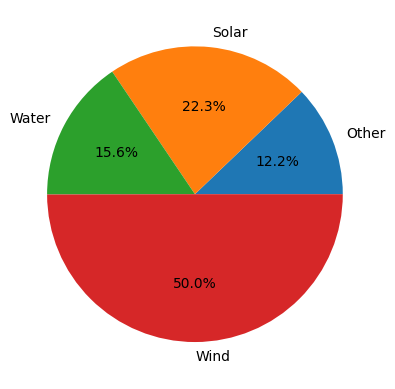

In [56]:
import matplotlib.pyplot as plt

labels = df_gen_2022_eu_gen_types["GenType"]
#sizes = df_gen_2022_eu_gen_types["quantity"]
sizes = df_gen_2022_eu_gen_types["normalized_quantity"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [46]:
df_gen_2022_uk_gen_types = df_gen_2022_country_gen_types[50:].groupby(by=["GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_uk_gen_types

,quantity,normalized_quantity
GenType,,
Wind,2522821.0,0.006272


In [50]:
df_gen_2022_country = df_gen_2022_country_gen_types.groupby(by=["Country"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_country

,quantity,normalized_quantity
Country,,
DE,977694257.0,2.430616
DK,25188499.0,0.062620
HU,20168463.0,0.050140
IT,82850580.0,0.205972
NL,61624129.0,0.153202
PO,32487589.0,0.080766
SE,103251674.0,0.256691
SP,327557834.0,0.814332
UK,2522821.0,0.006272


In [51]:
df_gen_2022_country = df_gen_2022_country.reset_index()
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,977694257.0,2.430616
1,DK,25188499.0,0.062620
2,HU,20168463.0,0.050140
3,IT,82850580.0,0.205972
4,NL,61624129.0,0.153202
5,PO,32487589.0,0.080766
6,SE,103251674.0,0.256691
7,SP,327557834.0,0.814332
8,UK,2522821.0,0.006272


In [52]:
df_gen_2022_country = df_gen_2022_country.sort_values("quantity", ascending=False)
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,977694257.0,2.430616
7,SP,327557834.0,0.814332
6,SE,103251674.0,0.256691
3,IT,82850580.0,0.205972
4,NL,61624129.0,0.153202
5,PO,32487589.0,0.080766
1,DK,25188499.0,0.062620
2,HU,20168463.0,0.050140
8,UK,2522821.0,0.006272


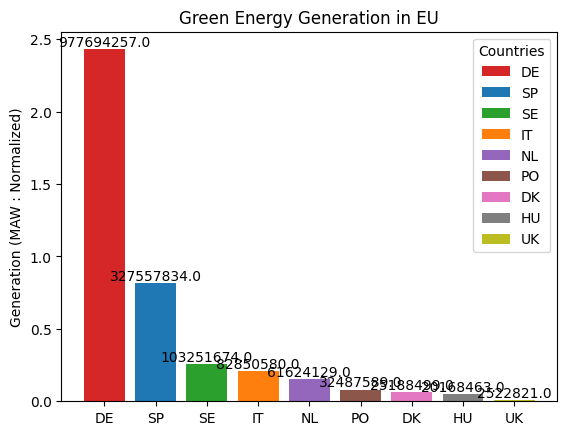

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

countries = df_gen_2022_country["Country"]
ener_gen = df_gen_2022_country["normalized_quantity"]
bar_labels = countries
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

bar_container = ax.bar(countries, ener_gen, label=bar_labels, color=bar_colors)

ax.set_ylabel('Generation (MAW : Normalized)')
ax.set_title('Green Energy Generation in EU')
ax.legend(title='Countries')
ax.bar_label(bar_container, labels=df_gen_2022_country["quantity"])

plt.show()